# Feature Importance with SHAP

## Setup & Imports

In [8]:
import pandas as pd
import shap
import joblib
from pathlib import Path
from analysis.feature_analysis.utils.shap_utils import ShapVisualizer

from sklearn.preprocessing import LabelEncoder
from models.baseline_model.baseline_model_utils import split_into_X_y
from general_utils.constants import spectral_bands, indices

bands_and_indices = spectral_bands + indices

## Train/Load Modell

In [9]:
BASELINE_DIR = Path("../../../data/baseline_training")
BASELINE_DIR.mkdir(parents=True, exist_ok=True)

MODEL_PATH = BASELINE_DIR / "baseline_xgb_model.joblib"
TEST_DF_PATH = BASELINE_DIR / "df_test.csv"
TRAIN_DF_PATH = BASELINE_DIR / "df_train.csv"


if not MODEL_PATH.exists():
    print("Model not found — training baseline model...")
    !python ../../models/baseline_model/run_baseline_model.py
else:
    print(f"Model already exists at: {MODEL_PATH}")

xgb_baseline_model = joblib.load(MODEL_PATH)

df_test = pd.read_csv(TEST_DF_PATH)
df_train = pd.read_csv(TRAIN_DF_PATH)

le = LabelEncoder()
df_train["species_encoded"] = le.fit_transform(df_train["species"])
X_train, y_train, X_test = split_into_X_y(df_train, df_test)

Model already exists at: ..\..\..\data\baseline_training\baseline_xgb_model.joblib


## SHAP Feature Importance

In [10]:
explainer = shap.TreeExplainer(xgb_baseline_model)
shap_values = explainer(X_test) # multiclass -> list, shape (n_classes, n_samples, n_features)

In [11]:
vis = ShapVisualizer(shap_values, X_test, le, output_folder="shap_plots")

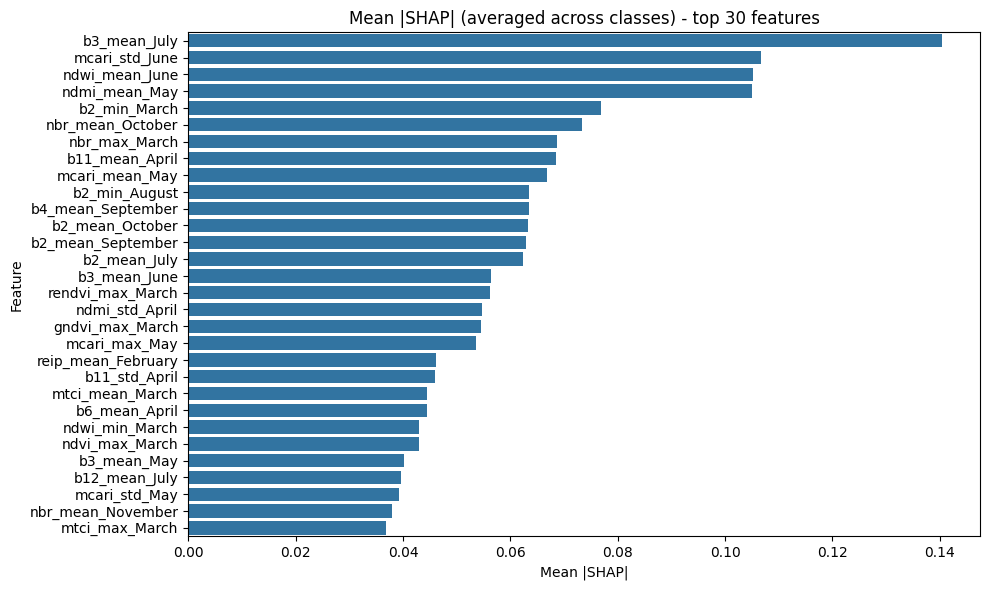

In [12]:
vis.plot_global_mean(top_n=30)

SHAP summary plots saved in: shap_plots


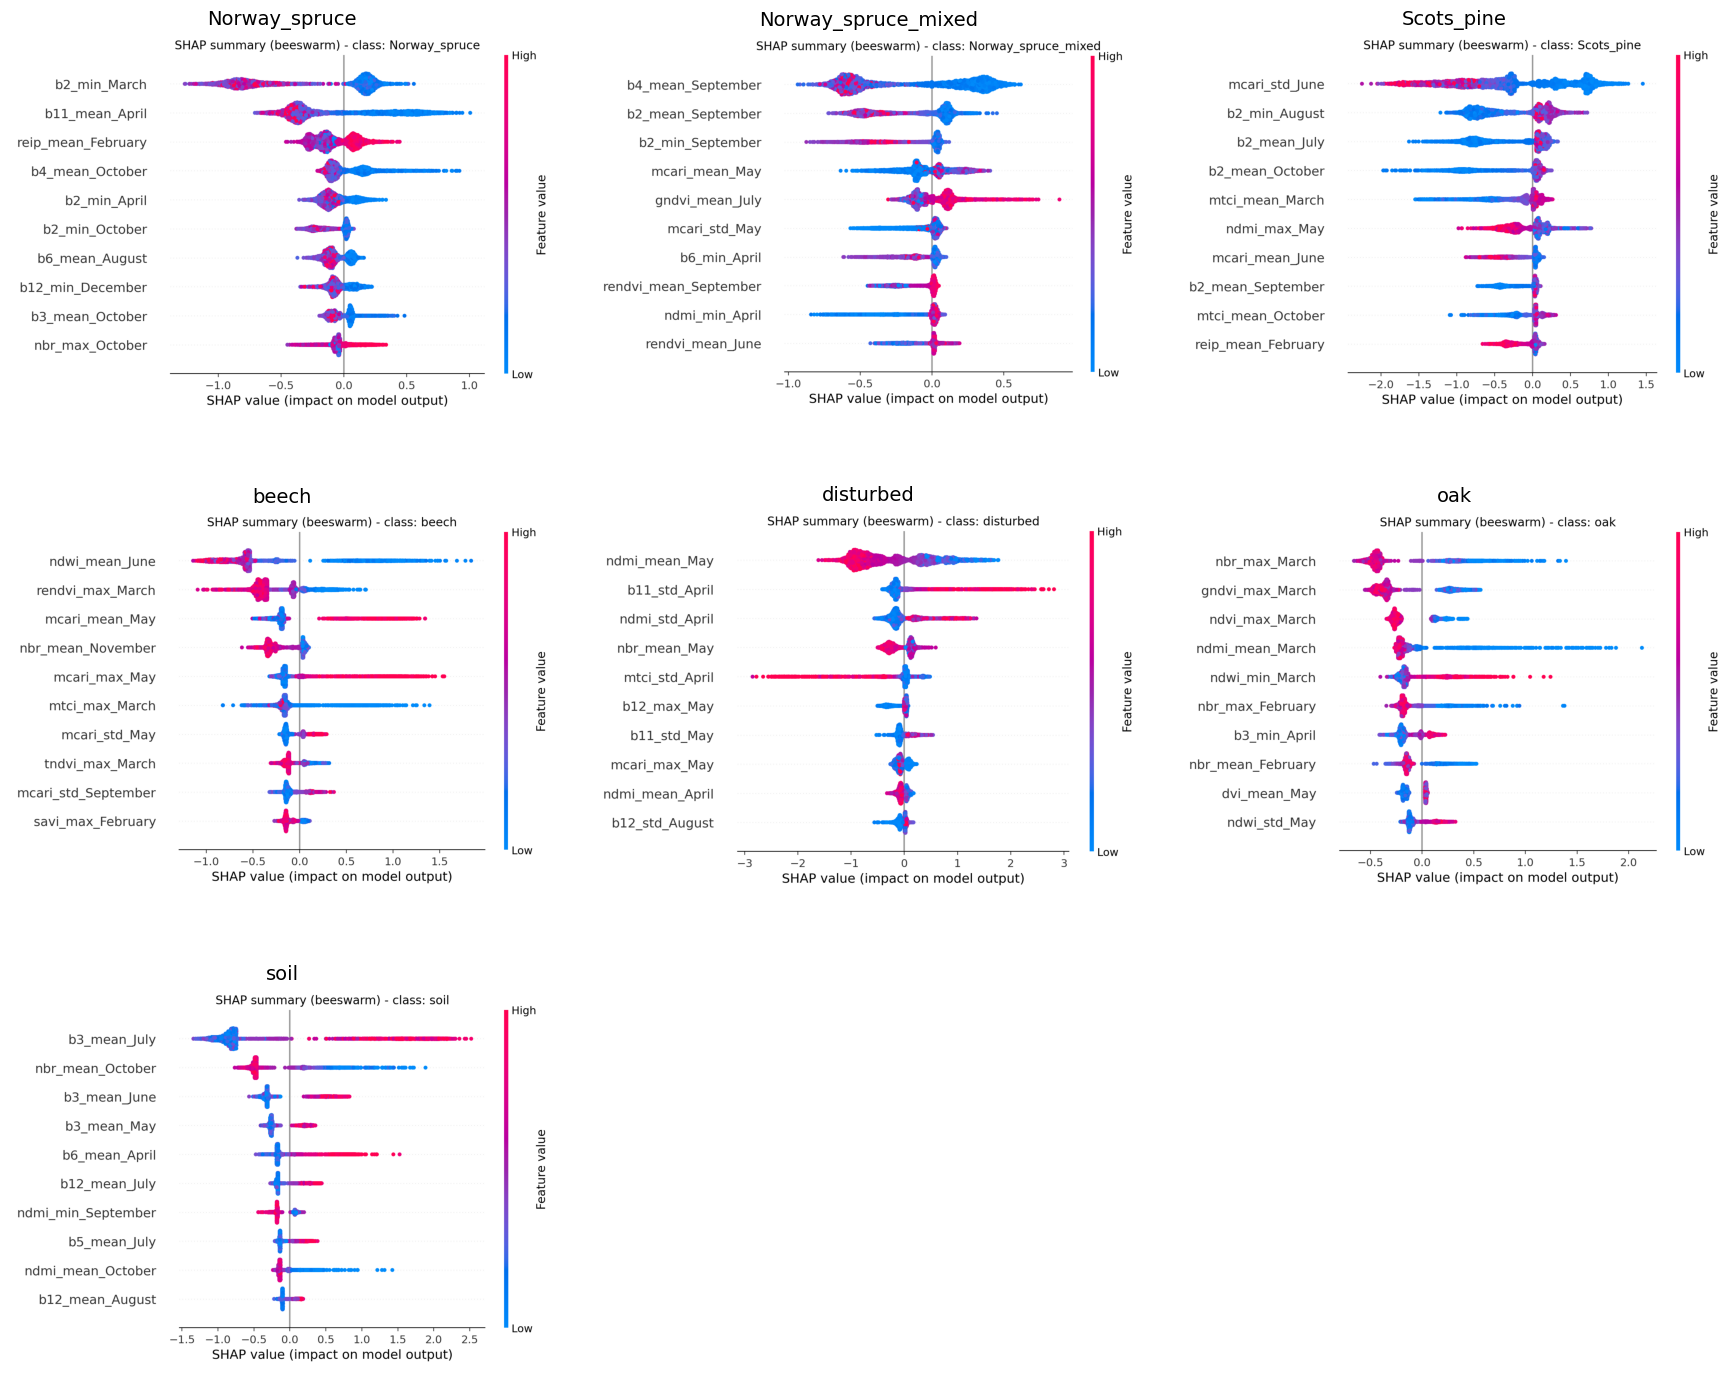

In [13]:
vis.save_class_summary_plots(max_display=10)
vis.plot_summary_grid(ncols=3, plot_type="shap")

## Dependence Plots

Identifying top SHAP feature for each class...
Dependence plots saved in: shap_plots


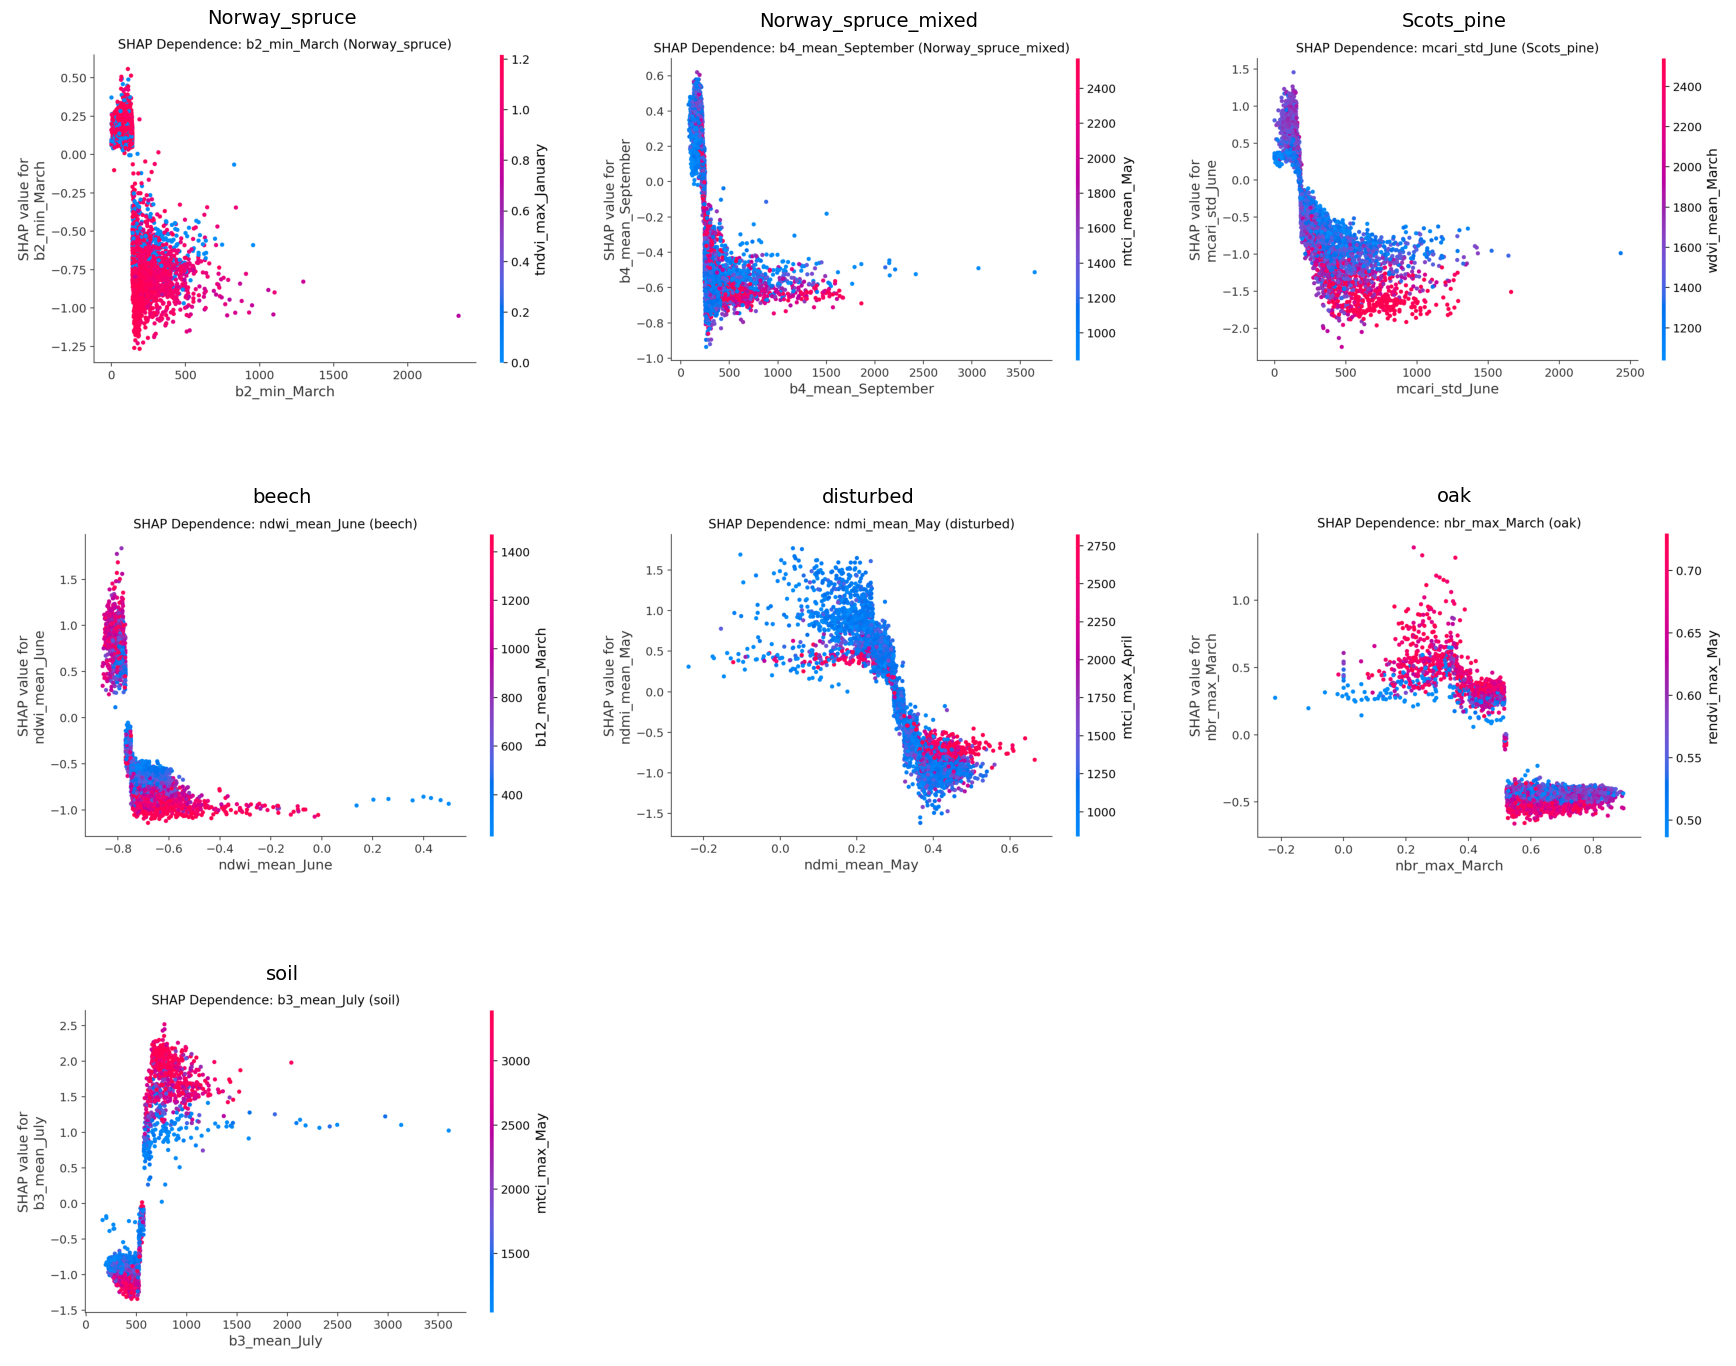

In [14]:
# Generate one dependence plot per species for its top SHAP feature
top_features = vis.plot_top_feature_dependence_per_class()
vis.plot_summary_grid(ncols = 3, plot_type="dependence")